## **Plottable**

_Serie B 2023/24_

In [10]:
# imports
import pandas as pd
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt

from plottable import ColumnDefinition, Table
from plottable.cmap import normed_cmap
from plottable.plots import image

Scrape data from [Fbref](https://fbref.com/), plot data with `Plottable` in `.py`

In [11]:
# read data from fbref
serieB = pd.read_html('https://fbref.com/en/comps/18/Serie-B-Stats', attrs={'id': "results2023-2024181_overall"})[0]

print(serieB.shape)
print('')
print(serieB.columns)
print('')
serieB.head()

(20, 20)

Index(['Rk', 'Squad', 'MP', 'W', 'D', 'L', 'GF', 'GA', 'GD', 'Pts', 'Pts/MP',
       'xG', 'xGA', 'xGD', 'xGD/90', 'Last 5', 'Attendance', 'Top Team Scorer',
       'Goalkeeper', 'Notes'],
      dtype='object')



,Rk,Squad,MP,W,D,L,GF,GA,GD,Pts,Pts/MP,xG,xGA,xGD,xGD/90,Last 5,Attendance,Top Team Scorer,Goalkeeper,Notes
0,1,Parma,31,19,8,4,57,32,25,65,2.10,43.3,31.9,11.4,0.37,D W W W L,8815,Dennis Man - 11,Leandro Chichizola,NaN
1,2,Como,31,17,7,7,45,33,12,58,1.87,38.3,32.0,6.3,0.20,W W L W W,3455,Patrick Cutrone - 11,Adrian Šemper,NaN
2,3,Venezia,31,17,6,8,58,38,20,57,1.84,47.2,32.4,14.9,0.48,W L W W L,3865,Joel Pohjanpalo - 19,Jesse Joronen,NaN
3,4,Cremonese,31,16,8,7,40,25,15,56,1.81,44.9,27.5,17.4,0.56,W W W L L,5982,Massimo Coda - 14,Andreas Jungdal,NaN
4,5,Catanzaro,31,15,7,9,49,39,10,52,1.68,37.6,40.6,-3.0,-0.10,W W L D W,6507,Pietro Iemmello - 11,Andrea Fulignati,NaN


In [12]:
# read and insert Club's badges
serieB['badge'] = serieB['Squad'].apply(
    lambda x: f"../../logos/SerieB/{x.lower()}.png"
)

In [13]:
# data cleaning
serieB[['xG', 'xGA', 'xGD', 'xGD/90']] = serieB[['xG', 'xGA', 'xGD', 'xGD/90']].astype(float)

serieB = serieB[[
    'Rk', 'badge', 'Squad', 'MP', 'W', 'D', 'L', 'GF', 'GA', 'GD', 'Pts', 'Pts/MP', 'xG', 'xGA', 'xGD', 'xGD/90'
]]

In [14]:
# set up the colors
bg_color = "#ffffff"
text_color = "#000000"

row_colors = {
    "top2": "#C9FFB2",
    "playoff": "#FFFAA0",
    "playout": "#FFB17A",
    "relegation": "#FF8080",
    "even": "#E2E2E1",
    "odd": "#B3B0B0",
}

plt.rcParams["text.color"] = text_color
plt.rcParams["font.family"] = "monospace"

In [15]:
# create ColumnDefinitions for the table
# 1- load images
# 2- add color
# 3- add columns to groups

col_defs = [
    ColumnDefinition(
        name="Rk",
        textprops={"ha": "center"},
        width=0.5,
    ),
    ColumnDefinition(
        name="badge",
        textprops={"ha": "center", "va": "center", 'color': bg_color},
        width=0.5,
        plot_fn=image,
    ),
    ColumnDefinition(
        name="Squad",
        textprops={"ha": "left", "weight": "bold"},
        width=1.75,
    ),
    ColumnDefinition(
        name="MP",
        group="Matches Played",
        textprops={"ha": "center"},
        width=0.5,
    ),
    ColumnDefinition(
        name="W",
        group="Matches Played",
        textprops={"ha": "center"},
        width=0.5,
    ),
    ColumnDefinition(
        name="D",
        group="Matches Played",
        textprops={"ha": "center"},
        width=0.5,
    ),
    ColumnDefinition(
        name="L",
        group="Matches Played",
        textprops={"ha": "center"},
        width=0.5,
    ),
    ColumnDefinition(
        name="GF",
        group="Goals",
        textprops={"ha": "center"},
        width=0.5,
    ),
    ColumnDefinition(
        name="GA",
        group="Goals",
        textprops={"ha": "center"},
        width=0.5,
    ),
    ColumnDefinition(
        name="GD",
        group="Goals",
        textprops={"ha": "center"},
        width=0.5,
    ),
    ColumnDefinition(
        name="Pts",
        group="Points",
        textprops={"ha": "center"},
        width=0.5,
    ),
    ColumnDefinition(
        name="Pts/MP",
        group="Points",
        textprops={"ha": "center"},
        width=0.5,
    ),
    ColumnDefinition(
        name="xG",
        group="Expected Goals",
        textprops={"ha": "center", "color": "#000000", "weight": "bold", "bbox": {"boxstyle": "circle", "pad": 0.35}},
        cmap=normed_cmap(serieB["xG"], cmap=matplotlib.cm.PiYG, num_stds=2)
    ),
    ColumnDefinition(
        name="xGA",
        group="Expected Goals",
        textprops={"ha": "center", "color": "#000000", "weight": "bold", "bbox": {"boxstyle": "circle", "pad": 0.35}},
        cmap=normed_cmap(serieB["xGA"], cmap=matplotlib.cm.PiYG_r, num_stds=2)
    ),
    ColumnDefinition(
        name="xGD",
        group="Expected Goals",
        textprops={"ha": "center", "color": "#000000", "weight": "bold", "bbox": {"boxstyle": "circle", "pad": 0.35}},
        cmap=normed_cmap(serieB["xGD"], cmap=matplotlib.cm.PiYG, num_stds=2)
    ),
]

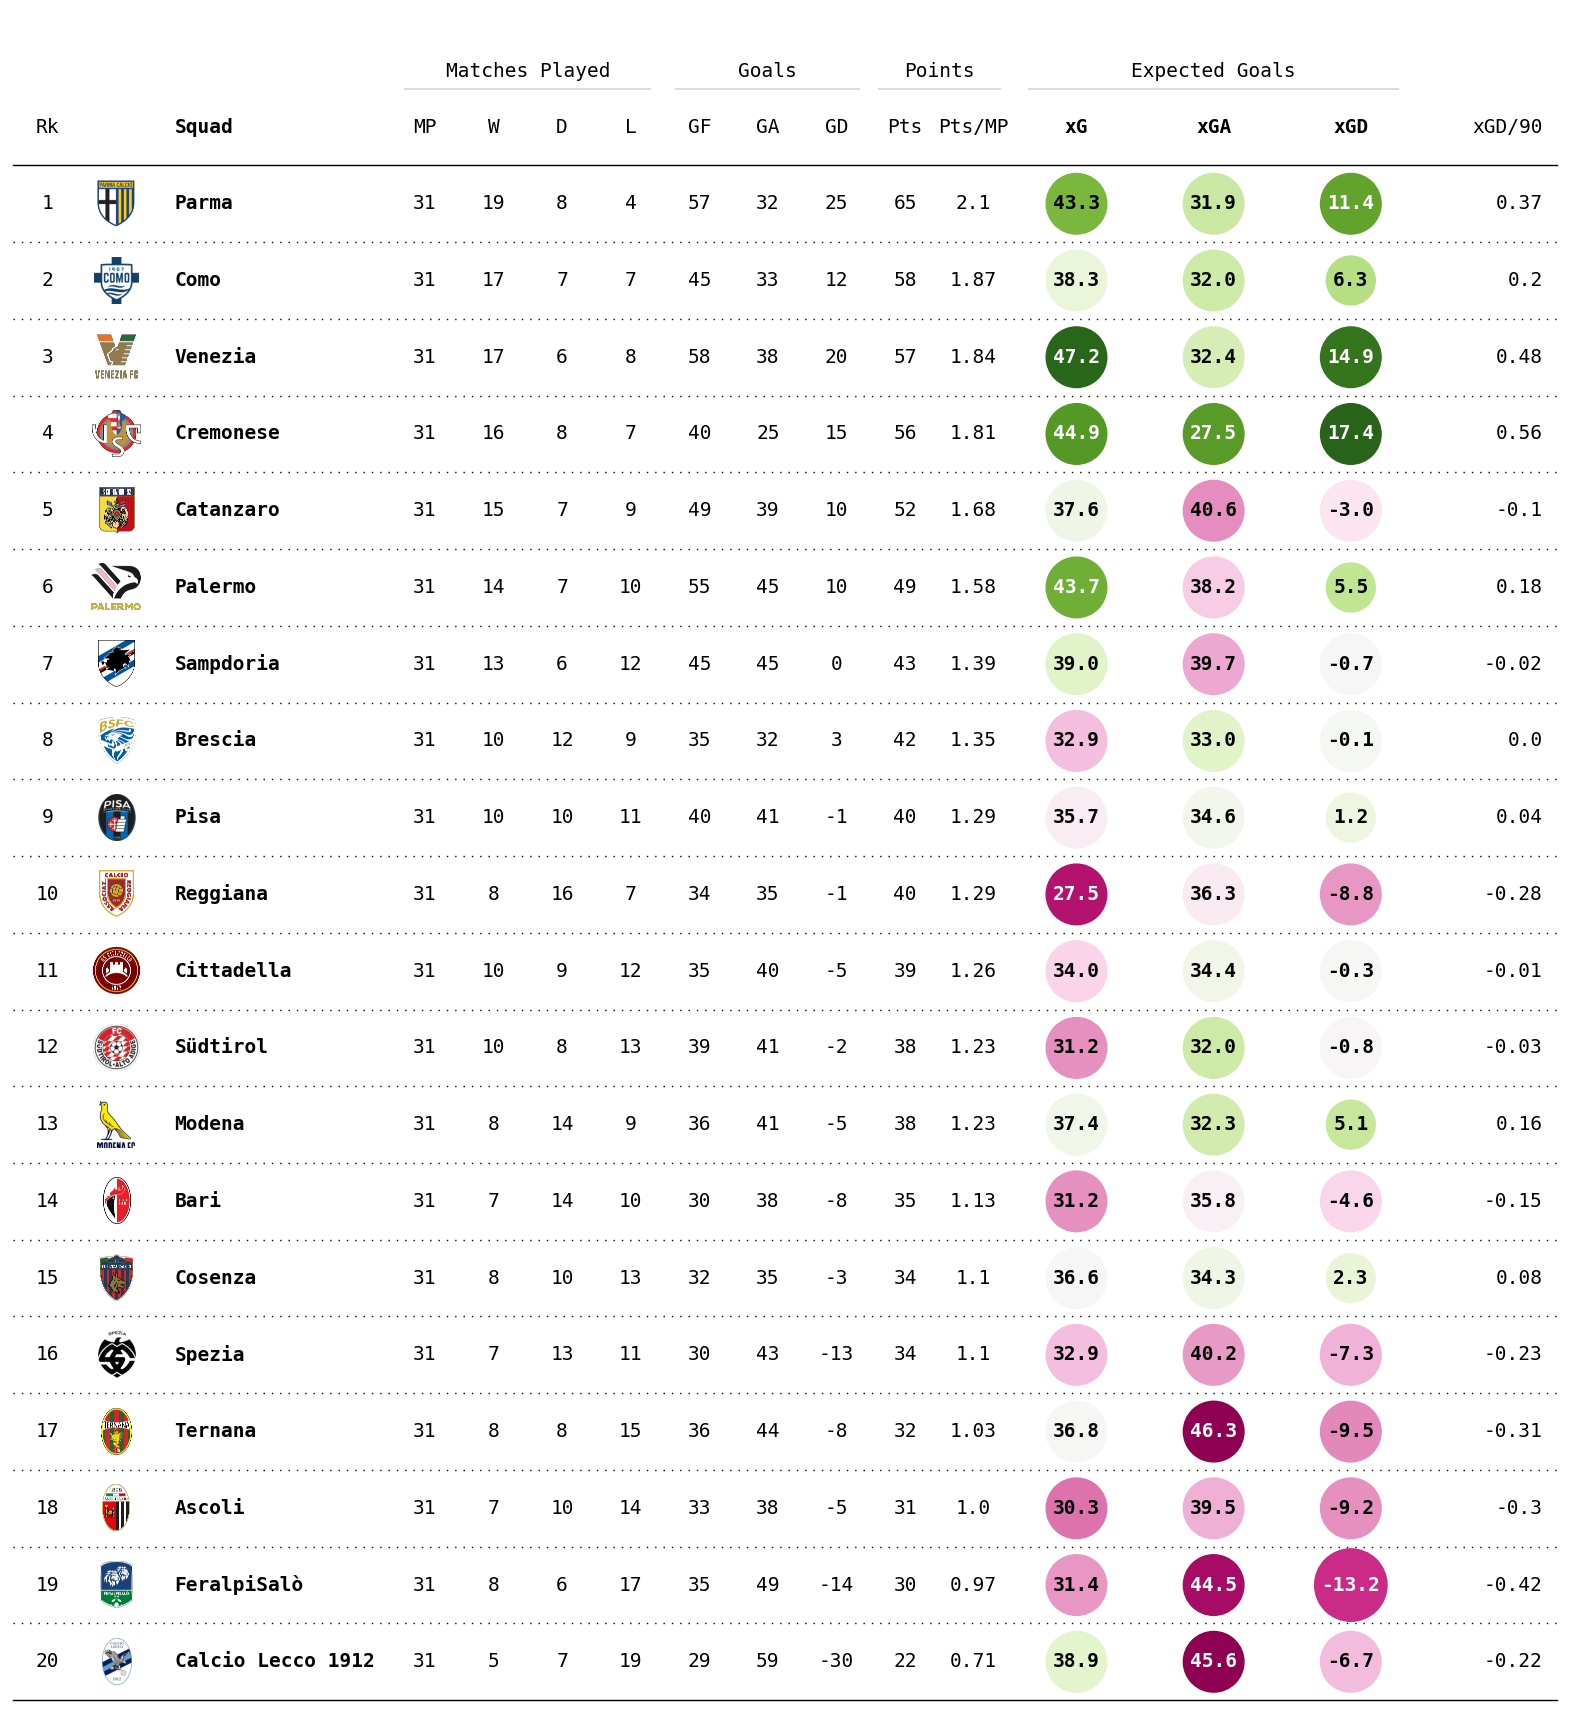

In [16]:
# create the table
fig, ax = plt.subplots(figsize=(20, 22))
fig.set_facecolor(bg_color)
ax.set_facecolor(bg_color)
table = Table(
    serieB,
    column_definitions=col_defs,
    index_col="Rk",
    row_dividers=True,
    row_divider_kw={"linewidth": 1, "linestyle": (0, (1, 5))},
    footer_divider=True,
    textprops={"fontsize": 14},
    col_label_divider_kw={"linewidth": 1, "linestyle": "-"},
    column_border_kw={"linewidth": .5, "linestyle": "-"},
    ax=ax,
).autoset_fontcolors(colnames=["xG", "xGA", "xGD"]) # This will set the font color of the columns based on the cmap so the text is readable

table.cells[10, 3].textprops["color"] = "#8ACB88"

# Optional: add colors to the rows

# for idx in [0, 1]:
#     table.rows[idx].set_facecolor(row_colors["top2"])
# for idx in [2,3, 4, 5, 6, 7]:
#     table.rows[idx].set_facecolor(row_colors["playoff"])
# for idx in [15, 16]:
#     table.rows[idx].set_facecolor(row_colors["playout"])
# for idx in [17, 18, 19]:
#     table.rows[idx].set_facecolor(row_colors["relegation"])

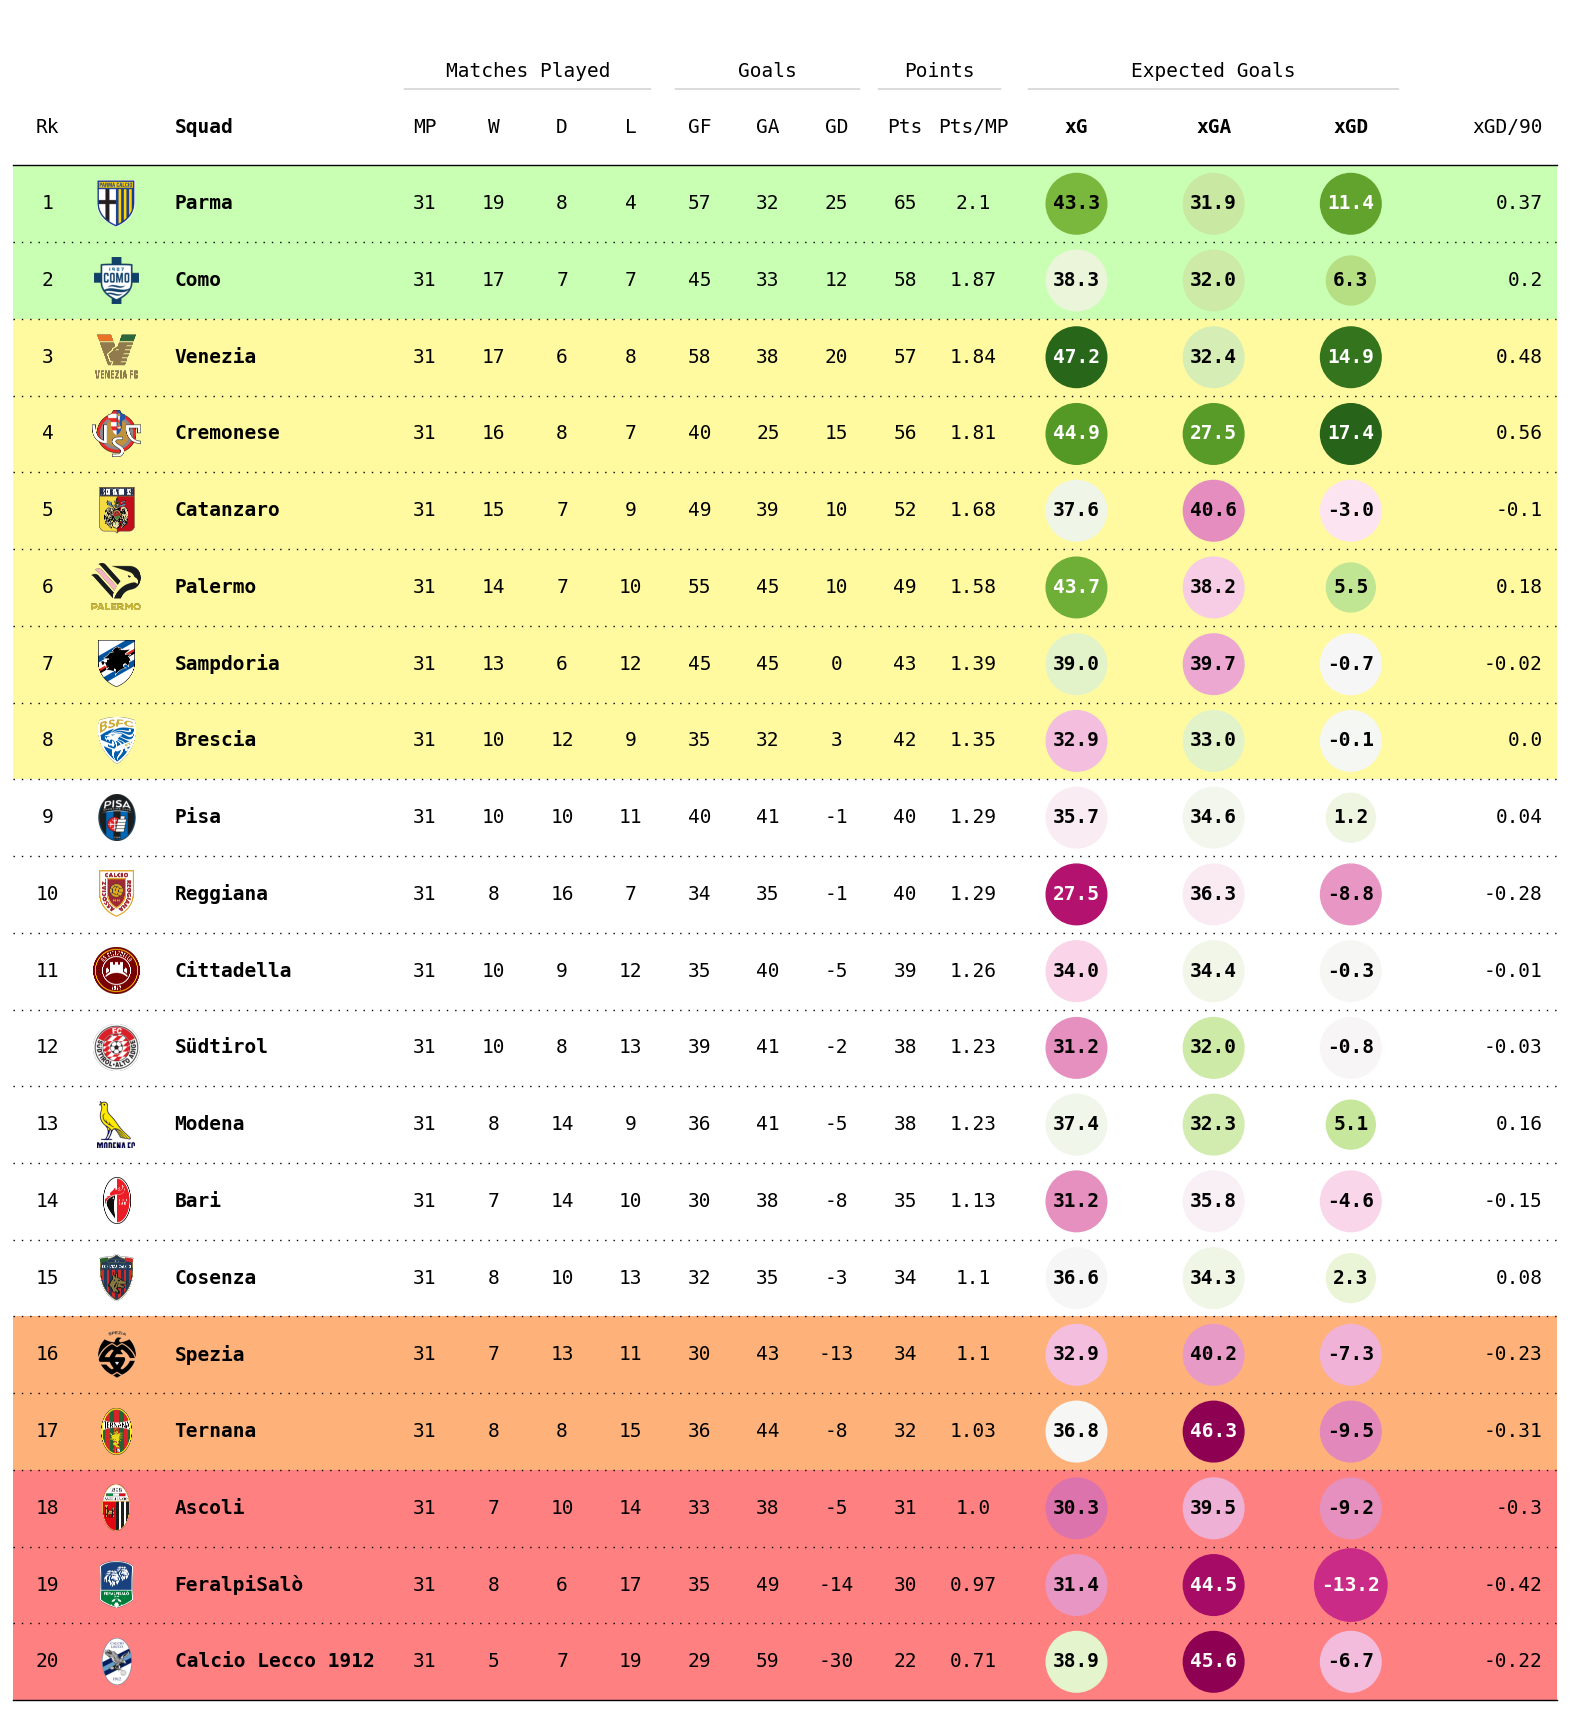

In [18]:
# create the table
fig, ax = plt.subplots(figsize=(20, 22))
fig.set_facecolor(bg_color)
ax.set_facecolor(bg_color)
table = Table(
    serieB,
    column_definitions=col_defs,
    index_col="Rk",
    row_dividers=True,
    row_divider_kw={"linewidth": 1, "linestyle": (0, (1, 5))},
    footer_divider=True,
    textprops={"fontsize": 14},
    col_label_divider_kw={"linewidth": 1, "linestyle": "-"},
    column_border_kw={"linewidth": .5, "linestyle": "-"},
    ax=ax,
).autoset_fontcolors(colnames=["xG", "xGA", "xGD"]) # This will set the font color of the columns based on the cmap so the text is readable

table.cells[10, 3].textprops["color"] = "#8ACB88"

# Optional: add colors to the rows

for idx in [0, 1]:
    table.rows[idx].set_facecolor(row_colors["top2"])
for idx in [2,3, 4, 5, 6, 7]:
    table.rows[idx].set_facecolor(row_colors["playoff"])
for idx in [15, 16]:
    table.rows[idx].set_facecolor(row_colors["playout"])
for idx in [17, 18, 19]:
    table.rows[idx].set_facecolor(row_colors["relegation"])

In [19]:
# save figure
fig.savefig("../figures/serieB_2324_MD31.png", facecolor=ax.get_facecolor(), dpi=200, bbox_inches="tight")